In [5]:
import numpy as np
%display latex
from scipy import constants

pi = constants.pi
hbar = 1
x, t = var('x', 't')
Psi = var('Psi')
assume(x, 'real')
assume(t, 'real')

The Wave function in the infinite square well is given by:

$V(x)=\begin{cases}0, 0\leq x\leq a\\ \infty, otherwise\end{cases}$

$\Psi_n(x,t)=\psi_n(x)\cdot\varphi_n(t)$

$\psi_n(x)=\sqrt{\frac2a}\cdot sin(\frac{n\pi}{a}x)$

$\varphi_n(t)=e^{\frac{-iE_n}{\hbar}t}$

$E_n=\frac{n^2\pi^2\hbar^2}{2ma^2}$

In total $\Psi$ can be calculated in the following way:

$\Psi(x,t)=\sum\limits_{n=1}^\infty c_n\Psi_n(x,t)$

with:

$c_n = \int\limits_{-\infty}^\infty \psi_n(x)^*\cdot\Psi(x,0)dx$

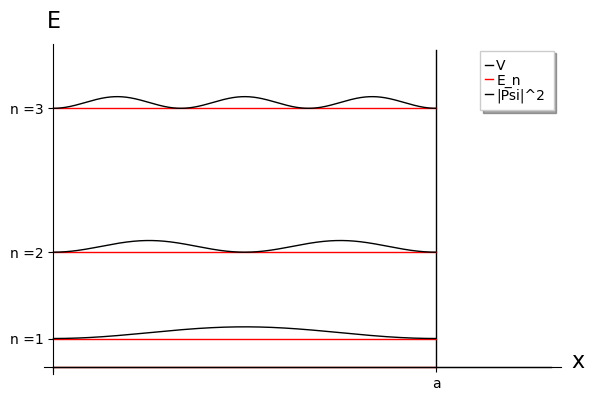

Animation with 128 frames
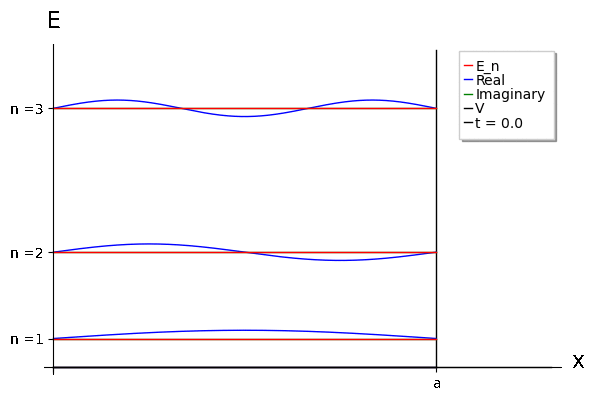

In [13]:

    

t_val = 0
n = 1
a = 1
m = 1

n_max = 3
E_max = (n_max^2*pi^2*hbar^2)/(2*m*a^2)

#markers on x-axis
x_marks = [0,a]
x_marks = [float(i) for i in x_marks]
x_names = ['0', 'a']

#markers on y axis
y_marks = []
y_names = []
for n in range(1,n_max+1):
    y_marks.append((n^2*pi^2*hbar^2)/(2*m*a^2))
    y_names.append("n =" + str(n))

y_marks = [float(i) for i in y_marks]


colors = ['black', 'red', 'blue', 'green']

#set up static image of probability density |Psi|^2
S = line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V')
S += plot(0, (0,a), color = colors[1], legend_label = 'E_n') + plot(0, (0,1.3*a), legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names])


#set up the legend once so it doesnt repeat the same for different n
P = animate([plot(0, (0,a), legend_label = 'E_n', color = colors[1]) + plot(0, (0,a), color = colors[2], legend_label = 'Real') + plot(0, (0,a), color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
for i in range(len(P)):
    P[i].set_legend_options(loc=1)



#Potential V + time tracker 0 line with ticks and axis lables.
P += animate([line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V') + plot(0, (0,1.3*a), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )

#calculate animations for different n
for n in range(1,n_max+1):
    
    E = (n^2*pi^2*hbar^2)/(2*m*a^2)
    psi = sqrt(2/a)*sin(n*pi*x/a)
    phi = e^(-I*E*t/hbar)
    
    eqAbs = Psi*Psi.conjugate() == psi*phi*psi*phi.conjugate()
    eqRe = Psi == psi*phi.real()
    eqIm = Psi == psi*phi.imag()
    S += plot(E, (0,a), color = colors[1]) + plot(eqAbs.rhs()+E, (0,a), color = 'black')
    P += animate([plot(eqRe.rhs()(t=t_val)+E, (x, 0, a), color = colors[2]) + plot(eqIm.rhs()(t=t_val)+E, (x,0,a), color = colors[3]) + plot(E, (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
show(S)
P.show(delay=2)

Now that we have visualized the static solutions to the Schrödinger Equation, we can move on to create non-static solutions, that are linear combinations of the static ones.

We will not automatically solve the probabilities for each static solution by the method described above, since we would need a initial condition $\Psi(x,0)$ and depending on that, the solutions change. Instead we are going to assume that all solutions are equally likely. Later we can make this more general, but for now it will suffice to create first moving wave functions, meaning $\langle p\rangle\neq0$. 

So we have the two conditions:

$c_n = c$

$\sum\limits_{n=1}^N|c_n|^2\stackrel{!}{=}1$

$\implies c=\frac{1}{\sqrt{N}}$

The Expectation value for the Energy can be calculated as:

$\langle \hat{H}\rangle = \sum\limits_{n=1}^N|c_n|^2E_n=\frac{\pi^2\hbar^2}{2mNa^2}\sum\limits_{n=1}^Nn^2=\frac{\pi^2\hbar^2}{2mNa^2}\frac{N(N+1)(2N+1)}{6}=\frac{\pi^2\hbar^2(N+1)(2N+1)}{12ma^2}$

Animation with 128 frames
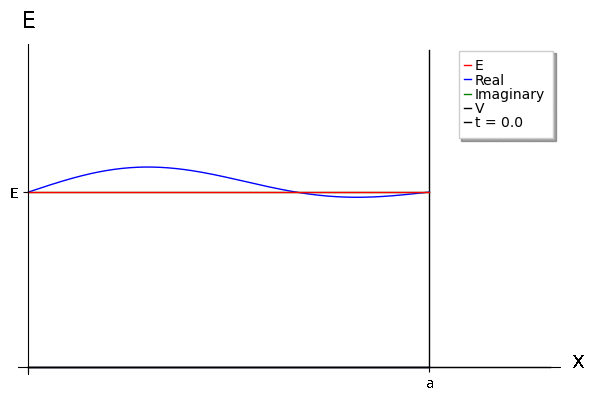

In [24]:
def lincomb(N, m, a):
    E = (pi^2*(N+1)*(2*N+1))/(12*m*a^2)
    c = 1/sqrt(N)
    
    eqRe = Psi.real() == 0
    eqIm = Psi.imag() == 0
    eqAbs = Psi*Psi.conjugate() == 0
    
    colors = ['black', 'red', 'blue', 'green']
    #markers on x-axis
    x_marks = [0,a]
    x_marks = [float(i) for i in x_marks]
    x_names = ['0', 'a']
    
    #markers on y axis
    y_marks = [E]
    y_names = ['E']
    y_marks = [float(i) for i in y_marks]
    
    #S = line([(a,0), (a,E_max+10)], color = colors[0], legend_label = 'V')
    #S += plot(0, (0,a), color = colors[1], legend_label = 'E_n') + plot(0, (0,1.3*a), legend_label = '|Psi|^2', color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names])
    
    P = animate([plot(0, (0,a), legend_label = 'E', color = colors[1]) + plot(0, (0,a), color = colors[2], legend_label = 'Real') + plot(0, (0,a), color = colors[3], legend_label = 'Imaginary') for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)])
    for i in range(len(P)):
        P[i].set_legend_options(loc=1)
        
    P += animate([line([(a,0), (a,E+10)], color = colors[0], legend_label = 'V') + plot(0, (0,1.3*a), legend_label = 't = ' + str(round(t_val,2)), color = 'black',axes_labels=['x','E'] , ticks=[x_marks,y_marks], tick_formatter=[x_names, y_names]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
    
    for n in range(1, N+1):
        En = (n^2*pi^2*hbar^2)/(2*m*a^2)
        
        psi = sqrt(2/a)*sin(n*pi*x/a)
        phi = e^(-I*En*t/hbar)
        
        
        eqRe = eqRe.lhs() == eqRe.rhs()+c*psi*phi.real()
        eqIm = eqIm.lhs() == eqIm.rhs()+c*psi*phi.imag()
        eqAbs = eqAbs.lhs() == eqAbs.rhs()+c^2*psi*phi*psi*phi.conjugate()
        
    P += animate([plot(eqRe.rhs()(t=t_val)+E, (x, 0, a), color = colors[2]) + plot(eqIm.rhs()(t=t_val)+E, (x,0,a), color = colors[3]) + plot(E, (0,a), color = colors[1]) for t_val in sxrange(0,(2*m*a^2)/(pi^2)*2*pi, .01)] )
    return P

lincomb(2, 1, 1).show(delay = 2)

In [6]:
np.array([1,2])+np.array([2,3])

array([3, 5])